# Task 2.4

Recap the process of sampling & quantization by hand. Take a pen & paper and
draw a sine wave that is made up of two cycles.  Now you are supposed to draw
the sample points for sampling rates of 4Hz & 10Hz as well as quantization
points for sample sizes of 1bit, 2bit, and 3bit. How do the resulting sampled
sine waves look like?

---

In [8]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = (8, 6)

In [2]:
def sample(signal, samplerate, start, end):
    times = np.arange(start, end, step=1/samplerate)
    samples = signal(times)
    return times, samples
    
def quantization_levels(bitdepth, lowest, highest):
    return np.linspace(lowest, highest, 2**bitdepth)

def quantize(values, levels):
    limits = np.mean([levels[:-1], levels[1:]], axis=0)
    return np.array([levels[level] for level in np.digitize(samples, limits)])

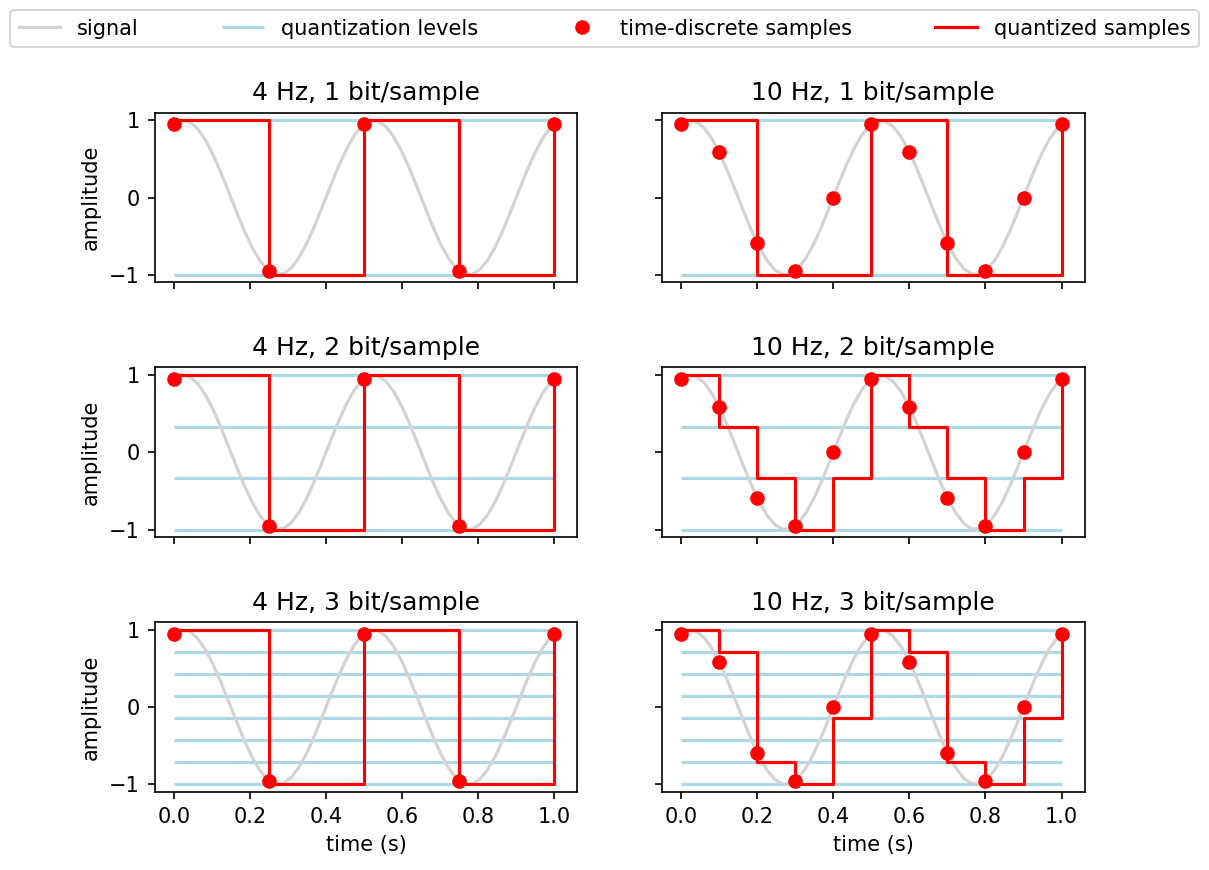

In [9]:
# signal function
# works with single values and numpy arrays as input
def sinewave(t):
    return np.sin((t + 0.1) * 4 * np.pi)

# sampling interval
# add a slight overhead to the end to include one sample at the exact end of the interval
start, end = 0, 1.01

# quantization range
lowest, highest = -1, 1

# sampling parameters
samplerates = [4, 10]
bitdepths = [1,2,3]

fig, axes = plt.subplots(len(bitdepths), len(samplerates), sharex='col', sharey='row')

for si, samplerate in enumerate(samplerates):
    times, samples = sample(sinewave, samplerate, start, end)
    
    for di, bitdepth in enumerate(bitdepths):
        levels = quantization_levels(bitdepth, lowest, highest)
        quantized_samples = quantize(samples, levels)
        
        ax = axes[di, si]
        
        ax.set(title=f'{samplerate} Hz, {bitdepth} bit/sample', xlabel='time (s)', ylabel='amplitude')
        
        p_levels = ax.hlines(levels, 0, 1, color="lightblue")
        p_signal, = ax.plot(np.linspace(start, end), sinewave(np.linspace(start, end)), color='lightgray')
        p_samples, = ax.plot(times, samples, 'o', color='red')
        p_quantized, = ax.step(times, quantized_samples, where='post', color='red')
        
# only show axis labels in outer axes
for ax in axes.flat:
    ax.label_outer()

fig.legend(
        (p_signal, p_levels, p_samples, p_quantized),
        ('signal', 'quantization levels', 'time-discrete samples', 'quantized samples'),
        loc='upper center',
        mode='expand',
        ncol=4)

fig.subplots_adjust(hspace=0.5)